# Regressão Linear

## Jayne Morais (Aprendizagem de Máquina)

# Análise Exploratória dos Dados

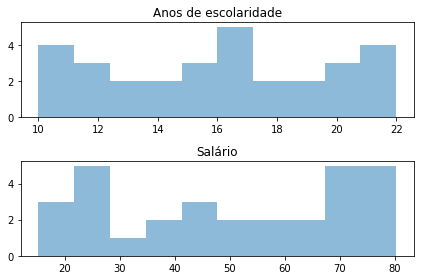

In [1]:
import csv 
import os
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline

points = np.genfromtxt('https://raw.githubusercontent.com/devjaynemorais/linear_regression_live/master/income.csv', delimiter=',')
points = np.array(points)
x = np.around(points[0:,0:1], decimals=0)
#print(x)
# instancia um subplot com 2 linhas e 1 coluna
# e define o primeiro subplot como o ativo
plt.subplot(2, 1, 1)

# 1o plot
plt.hist(x, bins=10, alpha=0.5)
plt.title('Anos de escolaridade')
#plt.xticks(np.arange(min(points[0:,0:1]), max(points[0:,0:1])+1, 0.5))


# 2o plot
plt.subplot(2, 1, 2)
plt.hist(points[0:,1:2], bins=10, alpha=0.5)
plt.title('Salário')

# ajusta os gráficos na figura automaticamente (experimente rodar sem essa linha)
plt.tight_layout()


## Analisando a relação dos dados

No handles with labels found to put in legend.


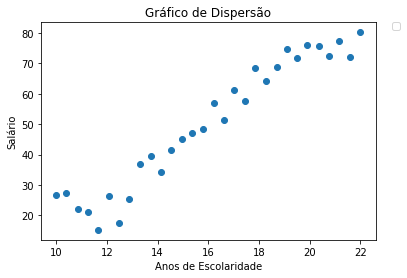

In [2]:
plt_comprou = plt.scatter(points[0:,0:1], points[0:,1:2])

plt.legend( bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Gráfico de Dispersão')
plt.xlabel('Anos de Escolaridade')
plt.ylabel('Salário')
plt.show()

# 1. Rode o mesmo programa nos dados contendo anos de escolaridade (primeira coluna) versus salário (segunda coluna). Baixe os dados aquiVisualizar o documento. Esse exemplo foi trabalhado em sala de aula em várias ocasiões. Os itens a seguir devem ser respondidos usando esses dados.

In [3]:
from numpy import *


def compute_error_for_line_given_points(b, m, points):   
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b))**2
    return totalError / float(len(points)) 


def step_gradiente(b_current, m_current, points, learningRate):
    #gradiente descent
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]        
        #Derivadas 
        b_gradient += -(2/N) * (y -((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y -((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]


def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_interations):
    b = starting_b
    m = starting_m
    for i in range(num_interations):
        b, m = step_gradiente(b, m, array(points), learning_rate)
    return [b,m]

  
def run():
    points = genfromtxt('https://raw.githubusercontent.com/devjaynemorais/linear_regression_live/master/income.csv', delimiter=',')    
    print(points)    
    #hiperparametros
    learning_rate = 0.0001    
    initial_b = 0 #intercept    
    initial_m = 0 #slope
    num_iterations = 1000 
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))


if __name__ == '__main__':
  run()
    

[[10.         26.65883878]
 [10.40133779 27.30643535]
 [10.84280936 22.13241017]
 [11.24414716 21.1698405 ]
 [11.64548495 15.19263352]
 [12.08695652 26.39895104]
 [12.48829431 17.43530658]
 [12.88963211 25.50788523]
 [13.2909699  36.88459469]
 [13.73244147 39.66610875]
 [14.13377926 34.39628056]
 [14.53511706 41.49799354]
 [14.97658863 44.98157487]
 [15.37792642 47.03959526]
 [15.77926421 48.25257829]
 [16.22073579 57.03425134]
 [16.62207358 51.49091921]
 [17.02341137 61.33662055]
 [17.46488294 57.58198818]
 [17.86622074 68.55371402]
 [18.26755853 64.3109253 ]
 [18.7090301  68.95900864]
 [19.11036789 74.61463928]
 [19.51170569 71.8671953 ]
 [19.91304348 76.09813538]
 [20.35451505 75.77521803]
 [20.75585284 72.48605532]
 [21.15719064 77.35502057]
 [21.59866221 72.11879045]
 [22.         80.2605705 ]]
Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
After 1000 iterations b = -0.18234255376510086, m = 3.262182267596014, error = 103.39842291729676


# 2. Modifique o código original para imprimir o RSS a cada iteração do gradiente descendente. Gere um plot mostrando o RSS por interação.

[[10.         26.65883878]
 [10.40133779 27.30643535]
 [10.84280936 22.13241017]
 [11.24414716 21.1698405 ]
 [11.64548495 15.19263352]
 [12.08695652 26.39895104]
 [12.48829431 17.43530658]
 [12.88963211 25.50788523]
 [13.2909699  36.88459469]
 [13.73244147 39.66610875]
 [14.13377926 34.39628056]
 [14.53511706 41.49799354]
 [14.97658863 44.98157487]
 [15.37792642 47.03959526]
 [15.77926421 48.25257829]
 [16.22073579 57.03425134]
 [16.62207358 51.49091921]
 [17.02341137 61.33662055]
 [17.46488294 57.58198818]
 [17.86622074 68.55371402]
 [18.26755853 64.3109253 ]
 [18.7090301  68.95900864]
 [19.11036789 74.61463928]
 [19.51170569 71.8671953 ]
 [19.91304348 76.09813538]
 [20.35451505 75.77521803]
 [20.75585284 72.48605532]
 [21.15719064 77.35502057]
 [21.59866221 72.11879045]
 [22.         80.2605705 ]]
Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
Iteração: 0 | RSS: 2648.2381266261386
Iteração: 1 | RSS: 2381.1735926230144
Iteração: 2 | RSS: 2142.15101365

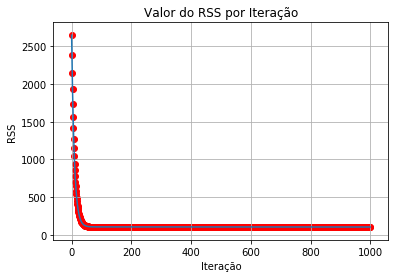

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline


def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_interations):
    b = starting_b
    m = starting_m
    lista_iteracao = []
    lista_rss = []
    for i in range(num_interations): 
        b, m = step_gradiente(b, m, array(points), learning_rate)
        val_rss = compute_error_for_line_given_points(b, m, points)
        lista_iteracao.append(i)
        lista_rss.append(val_rss)    
        print("Iteração: "+str(i)+" | "+"RSS: "+str(val_rss))       
    plt.plot(lista_iteracao, lista_rss) 
    plt.scatter(lista_iteracao, lista_rss, c="r") 
    plt.title('Valor do RSS por Iteração') # o title também aceita Latex Code
    plt.xlabel('Iteração')
    plt.ylabel('RSS')
    plt.grid()
    #plt.xlim([0,50])
    return [b,m]


if __name__ == '__main__':
  run()

# 3. O que acontece com o RSS ao longo das iterações (aumenta ou diminui) se você usar 1000 iterações e um learning_rate (tamanho do passo do gradiente) de 0.001? Por que você acha que isso acontece?

*A taxa de RSS diminui mais rápido com uma taxa de aprendizagem de 0.001 do que com a taxa de aprendizagem de 0.0001, o que quer dizer que, o tamanho do passo do gradiente é maior e nesse caso, o modelo consegue aprender e convergir mais rápido para um valor bem próximo a um limite ideal e, posteriormente reduz minimamente.
Após 1000 iterações, o modelo com a taxa de aprendizado de 0.001 atinge um RSS de 91.83, enquanto o modelo com taxa de aprendizado de 0.0001 ainte um RSS de 103.39, ou seja, possui um custo menor.*


Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
Iteração: 0 | RSS: 707.2710165896411
Iteração: 1 | RSS: 232.5087797348387
Iteração: 2 | RSS: 131.8466920693054
Iteração: 3 | RSS: 110.49483106359133
Iteração: 4 | RSS: 105.95695074236122
Iteração: 5 | RSS: 104.98368108783964
Iteração: 6 | RSS: 104.76612049084528
Iteração: 7 | RSS: 104.7087743547505
Iteração: 8 | RSS: 104.68539624416857
Iteração: 9 | RSS: 104.66922157932235
Iteração: 10 | RSS: 104.65457619785734
Iteração: 11 | RSS: 104.64025716188911
Iteração: 12 | RSS: 104.6260094449875
Iteração: 13 | RSS: 104.61177898046678
Iteração: 14 | RSS: 104.59755430564046
Iteração: 15 | RSS: 104.5833329899831
Iteração: 16 | RSS: 104.56911451781136
Iteração: 17 | RSS: 104.55489877939368
Iteração: 18 | RSS: 104.54068575106113
Iteração: 19 | RSS: 104.5264754273909
Iteração: 20 | RSS: 104.51226780682809
Iteração: 21 | RSS: 104.498062888638
Iteração: 22 | RSS: 104.48386067225972
Iteração: 23 | RSS: 104.46966115716968
It

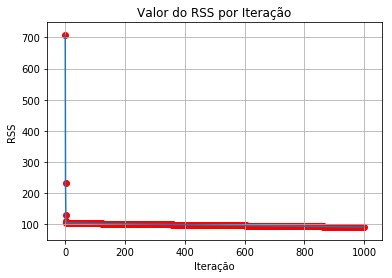

In [5]:
def run():
    points = genfromtxt('https://raw.githubusercontent.com/devjaynemorais/linear_regression_live/master/income.csv', delimiter=',')
    #hiperparametros
    learning_rate = 0.001  
    initial_b = 0 #intercept
    initial_m = 0 #slope
    num_iterations = 1000 
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))


if __name__ == '__main__':
  run()

# 4. Teste valores diferentes do número de iterações e learning_rate até que w0 e w1 sejam aproximadamente iguais a -39 e 5 respectivamente. Reporte os valores do número de iterações e learning_rate usados para atingir esses valores.

* Número de iterações: 16000
* Learning Rate: 0.003

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
Iteração: 0 | RSS: 1192.5455472930987
Iteração: 1 | RSS: 521.0988679373211
Iteração: 2 | RSS: 264.05991996034976
Iteração: 3 | RSS: 165.64564660688742
Iteração: 4 | RSS: 127.94884867299184
Iteração: 5 | RSS: 113.49315935425516
Iteração: 6 | RSS: 107.93358583303076
Iteração: 7 | RSS: 105.77923246806222
Iteração: 8 | RSS: 104.92832511402729
Iteração: 9 | RSS: 104.57635848152458
Iteração: 10 | RSS: 104.41538855420625
Iteração: 11 | RSS: 104.32754224572047
Iteração: 12 | RSS: 104.26770075079159
Iteração: 13 | RSS: 104.21859373847666
Iteração: 14 | RSS: 104.17361056014224
Iteração: 15 | RSS: 104.13022082037249
Iteração: 16 | RSS: 104.08745594012417
Iteração: 17 | RSS: 104.04494516364169
Iteração: 18 | RSS: 104.00254656660842
Iteração: 19 | RSS: 103.96020581552351
Iteração: 20 | RSS: 103.91790210440996
Iteração: 21 | RSS: 103.87562746077316
Iteração: 22 | RSS: 103.83337882445097
Iteração: 23 | RSS: 103.791155015

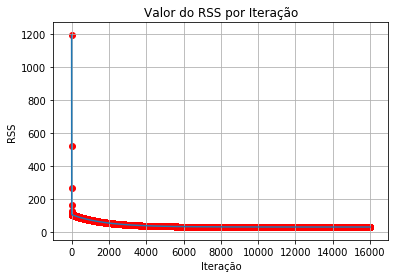

In [6]:
def run():
    points = genfromtxt('https://raw.githubusercontent.com/devjaynemorais/linear_regression_live/master/income.csv', delimiter=',')        
    #hiperparametros
    learning_rate = 0.003 
    initial_b = 0 #intercept
    initial_m = 0 #slope
    num_iterations = 16000                                     
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))


if __name__ == '__main__':
  run()

# 5. O algoritmo do vídeo usa o número de iterações como critério de parada. Mude o algoritmo para considerar um critério de tolerância que é comparado ao tamanho do gradiente (como no algoritmo dos slides apresentados em sala). 

*A execução do algoritmo utilizado leva em consideração o cálculo da norma do gradiente, para isto, utilizou-se como condição de parada, o critério de tolerância definido como valor de threshold de 0,001.*

In [7]:
#Testes
import numpy as np
from numpy import linalg as LA
list_py = [10, 2, 3]

# Array numpy: cool e descolado
vector_np = np.array([1, 20, 3])

print(LA.norm(vector_np))


x = np.array([2, 1, 1]) - np.array([1, 0, 1])
print(x)
print(LA.norm(x))

20.248456731316587
[1 1 0]
1.4142135623730951


In [8]:

def calcula_norma1(vetor): 
  vetor = np.array(vetor) 
  norma = LA.norm(vetor) 
  return norma


def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b))**2
    return totalError / float(len(points)) 


def step_gradiente(b_current, m_current, points, learningRate):
    #gradiente descent
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]       
        #Derivadas 
        b_gradient += -(2/N) * (y -((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y -((m_current * x) + b_current))       
        #print("Derivadas: w0 = "+ str(b_gradient) + " " + str(m_gradient)) DIMINUI
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    normaGradiente = sqrt(b_gradient**2+m_gradient**2) #Cálculo da norma
    return [new_b, new_m, normaGradiente]


def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_interations, limiar):
    b = starting_b
    m = starting_m
    it = []
    gr = []
    i = 0
    #for i in range(num_interations):
    while(True):
        b, m, normaGradiente = step_gradiente(b, m, array(points), learning_rate)
        #print("IT:" + str(i)+" ---- w0 = "+str(b)+"w1 = "+str(m)) AUMENTA
        print("Iteração:" + str(i)+" ---- NormaGradiente = "+str(normaGradiente)) #DIMINUI
        erro = compute_error_for_line_given_points(b, m, points)
        print("Erro: "+ str(erro)) #DIMUNUI RSS
       
        it.append(i)
        gr.append(normaGradiente)
        i = i+1
        if(normaGradiente < limiar):
          break   
    plt.plot(it, gr)  
    plt.scatter(it, gr, c='r') 
    plt.title('Valor da Norma do Gradiente por Iteração') # o title também aceita Latex Code
    plt.xlabel('Iteração')
    plt.ylabel('Norma do Gradiente (RSS)')
    plt.grid()
    #plt.xlim([3.5, 5])
    return [b,m]

  
def run():
    points = genfromtxt('https://raw.githubusercontent.com/devjaynemorais/linear_regression_live/master/income.csv', delimiter=',')    
    #hiperparametros
    learning_rate = 0.001  
    initial_b = 0 #intercept   
    initial_m = 0 #slope
    num_iterations = 0 
    limiar = 0.001 #definindo o valor threshold
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations, limiar)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))


if __name__ == '__main__':
  run()
    
    

Output hidden; open in https://colab.research.google.com to view.

# 6. Ache um valor de tolerância que se aproxime dos valores dos parâmetros do item 4 acima. Que valor foi esse?

*O valor de tolerância de 0.04.*

In [9]:

def calcula_norma1(vetor): 
  vetor = np.array(vetor) 
  norma = LA.norm(vetor) 
  return norma


def compute_error_for_line_given_points_item6(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b))**2
    return totalError / float(len(points)) 


def step_gradiente_item6(b_current, m_current, points, learningRate):
    #gradiente descent
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]       
        #Derivadas 
        b_gradient += -(2/N) * (y -((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y -((m_current * x) + b_current))       
        #print("Derivadas: w0 = "+ str(b_gradient) + " " + str(m_gradient)) DIMINUI
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    normaGradiente = sqrt(b_gradient**2+m_gradient**2) #Cálculo da norma
    return [new_b, new_m, normaGradiente]


def gradient_descent_runner_item6(points, starting_b, starting_m, learning_rate, num_interations, limiar):
    b = starting_b
    m = starting_m
    it = []
    gr = []
    i = 0
    #for i in range(num_interations):
    while(True):
        b, m, normaGradiente = step_gradiente_item6(b, m, array(points), learning_rate)
        #print("IT:" + str(i)+" ---- w0 = "+str(b)+"w1 = "+str(m)) AUMENTA
        print("Iteração:" + str(i)+" ---- NormaGradiente = "+str(normaGradiente)) #DIMINUI
        erro = compute_error_for_line_given_points_item6(b, m, points)
        print("Erro: "+ str(erro)) #DIMUNUI RSS
        val_rss = compute_error_for_line_given_points_item6(b, m, points)
        print("Iteração: "+str(i)+" | "+"RSS: "+str(val_rss))
        print ("After {0} iterations b = {1}, m = {2}, rss = {3}".format(i, b, m, val_rss))
        it.append(i)
        gr.append(normaGradiente)
        i = i+1
        if(normaGradiente < limiar):
          break
          
    plt.subplot(2, 1, 1)
    plt.plot(it, gr, label = 'Método por valor de tolerância')  
    plt.scatter(it, gr, c='r', alpha = 0.5, marker='^') 
    plt.title('Valor da Norma do Gradiente por Iteração') # o title também aceita Latex Code
    plt.xlabel('Iteração')
    plt.ylabel('Norma do Gradiente (RSS)')
    plt.grid()
    plt.legend()
    plt.xlim([-1, 50])
    return [b,m]

  
def run_item6():
    points = genfromtxt('https://raw.githubusercontent.com/devjaynemorais/linear_regression_live/master/income.csv', delimiter=',')    
    
    #hiperparametros
    learning_rate = 0.001  
    initial_b = 0 #intercept   
    initial_m = 0 #slope
    num_iterations = 0 
    limiar = 0.04 #definindo o valor threshold
    
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points_item6(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner_item6(points, initial_b, initial_m, learning_rate, num_iterations, limiar)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points_item6(b, m, points)))


if __name__ == '__main__':
  run_item6()
    
    

Output hidden; open in https://colab.research.google.com to view.

# 7. Implemente a forma fechada (equações normais) de calcular os coeficientes de regressão (vide algoritmo nos slides). Compare o tempo de processamento com o gradiente descendente considerando sua solução do item 6.

*O tempo levado pelo método baseado em encontrar as raízes das derivadas parciais do RSS (equações normais) leva menos tempo que o método com o valor de tolerância percorrendo o gradiente descendente. Uma diferença de tempo de processamento consideralvelmente grande e bastante significativa.* 

* VERSÃO: (Valor de Tolerância): 32659.470319747925ms
* VERSÃO: (Equações Normais): 18.77593994140625ms

In [10]:
import numpy as np
a = np.array([[40, 10], [50, 11]])
print(a.mean(axis=1) )    # to take the mean of each row
print(a.mean(axis=0))     # to take the mean of each col


[25.  30.5]
[45.  10.5]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import pandas as pd

#points = pd.read_csv("https://raw.githubusercontent.com/devjaynemorais/linear_regression_live/master/income.csv", delimiter=',')
#init_notebook_mode(connected=True)


def compute_error_for_line_given_points(b, m, points): 
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b))**2
    return totalError / float(len(points)) 

  
def media_pontos(pontos):
    a = np.array(pontos)
    return (a.mean(axis=0))
  

def calc_gradiente(points, w0, w1, learningRate):
    medias = media_pontos(points)
    #print(medias)
    #average_x = average_points(points.x)
    #average_y = average_points(points.y)
    media_x = medias[0]
    media_y = medias[1]    
    w1_num = 0
    w1_denom = 0
    x = 0
    y = 0
    for i in range(0, len(points)):
        #print("entrei")
        x = points[i, 0]
        y = points[i, 1]
        #print("x = "+ str(x)+"y "+str(y))
        w1_num += (x - media_x)*(y - media_y)
        w1_denom += (x - media_x)**2
        #print("num = "+ str(w1_num)+"  dem"+str(w1_denom))
    w1 = w1_num / w1_denom
    w0 = media_y - w1*media_x
    print("w0 = "+str(w0))
    print("w1 = "+str(w1))    
    plt.subplot(2, 1, 2)
    plt.scatter(w1, w0, label='Método por equações normais', color='red') 
    #plt.scatter(lista_iteracao, lista_rss, c="g", alpha = 0.2) 
    #plt.title('Valor do RSS por Iteração') # o title também aceita Latex Code
    plt.xlabel('W0')
    plt.ylabel('W1')
    plt.grid()
    plt.legend()
    plt.xlim([-1,50])    
    return [w0, w1]
  
  
def run(): 
  points = genfromtxt('https://raw.githubusercontent.com/devjaynemorais/linear_regression_live/master/income.csv', delimiter=',')
  #hiperparametros
  learning_rate = 0.001
  #intercept
  initial_b = 0
  #slope
  initial_m = 0
  num_iterations = 1
  print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
  print ("Running...")
  [b, m] = calc_gradiente(points, initial_b, initial_m, learning_rate)
  #[b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
  print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
  
  
if __name__ == '__main__':
  
  print("###################################################################################################")
  tic = time.time()
  run_item6()
  toc = time.time()
  print("***VERSÃO*** (Valor de Tolerância): " + str(1000*(toc - tic))+"ms")
  print("###################################################################################################")
  
  print("####################################################################################################")
  tic = time.time()
  run()
  toc = time.time()  
  print("***VERSÃO*** (Equações Normais): " + str(1000*(toc - tic))+"ms")
  print("####################################################################################################")
  

  
  
  

    

Output hidden; open in https://colab.research.google.com to view.